# Fitting experimental data to thermodynamic models

Besides calculating and visualizing phase equilibria using known models, **pycalphad** also enables you to fit experimental data to a parameterized thermodynamic model. While pycalphad handles construction of the energy functions and equilibrium calculation, a separate module handles the numerical details of fitting disparate sources of data to the thermodynamic functions.

Here we consider the case study of the **Al-Mg-Zn** system. First, we use a TDB file as the setup for our model parameterizations. Note that not all of the parameters have not been filled in. These are what we will fit.

A+BT+CTln(T)+DT2+E/T+FT3 

**Model parametrization:** Liang, H., Chen, S. L., & Chang, Y. A. (1997). A thermodynamic description of the Al-Mg-Zn system. _Metallurgical and Materials Transactions A_, 28(9), 1725-1734.

In [1]:
%matplotlib inline

TDB_STR = """
$=============================================================================
$
$  Al-Mg-Zn System, almgzn.tdb
$  Parameterized by R. Otis from an Al-Cu-Mg-Zn database, 04-13-2015
$  Last updated: 01-07-1997 by H. Liang
$                                             
$  Based on Al-Mg-Zn[96Liang]
$
$=============================================================================
$
 ELEMENT /-   ELECTRON_GAS              0.0000E+00  0.0000E+00  0.0000E+00!
 ELEMENT VA   VACUUM                    0.0000E+00  0.0000E+00  0.0000E+00!
 ELEMENT AL   FCC_A1                    2.6982E+01  4.5773E+03  2.8322E+01!
 ELEMENT MG   HCP_A3                    2.4305E+01  4.9980E+03  3.2671E+01!
 ELEMENT ZN   HCP_A3                    6.5380E+01  5.6567E+03  4.1631E+01!

 
 FUNCTION UN_ASS     2.98140E+02 0.0; 3.00000E+02  N !
 FUNCTION GHSERAL    2.98130E+02  -7976.15+137.071542*T-24.3671976*T*LN(T)
     -.001884662*T**2-8.77664E-07*T**3+74092*T**(-1);  7.00000E+02  Y
      -11276.24+223.02695*T-38.5844296*T*LN(T)+.018531982*T**2
     -5.764227E-06*T**3+74092*T**(-1);  9.33600E+02  Y
      -11277.683+188.661987*T-31.748192*T*LN(T)-1.234264E+28*T**(-9);
     2.90000E+03  N !
 FUNCTION GHSERMG    2.98130E+02  -8367.34+143.677875*T-26.1849782*T*LN(T)
     +4.858E-04*T**2-1.393669E-06*T**3+78950*T**(-1);  9.23000E+02  Y
      -14130.185+204.718543*T-34.3088*T*LN(T)+1.038192E+28*T**(-9);
     3.00000E+03  N !
 FUNCTION GHSERZN    2.98140E+02  -7285.787+118.470069*T-23.701314*T*LN(T)
   -.001712034*T**2-1.264963E-06*T**3;  6.92680E+02  Y
   -11070.559+172.34566*T-31.38*T*LN(T)+4.70514E+26*T**(-9);
     1.70000E+03  N !
$
 FUNCTION GALLIQ     2.98130E+02  +11005.553-11.840873*T+7.9401E-20*T**7
     +GHSERAL#;  9.33600E+02  Y
      +10481.974-11.252014*T+1.234264E+28*T**(-9)+GHSERAL#;  
     2.90000E+03  N !
 FUNCTION GMGLIQ     2.98130E+02  +8202.24-8.83693*T-8.01759E-20*T**7
     +GHSERMG#;  9.23000E+02  Y
      +8690.32-9.39216*T-1.03819E+28*T**(-9)+GHSERMG#;  3.00000E+03  N !
 FUNCTION GZNLIQ     2.70000E+02  -128.517+108.176926*T-23.701314*T*LN(T)
     -.001712034*T**2-1.264963E-06*T**3-3.58652E-19*T**7;  6.92730E+02  Y
      -3620.474+161.608677*T-31.38*T*LN(T);  2.90000E+03  N !
$
 FUNCTION GBCCAL  2.98150E+02  +10083-4.813*T+GHSERAL#; 6.00000E+03  N !
 FUNCTION GBCCZN  2.98150E+02  +2886.96-2.5104*T+GHSERZN#;
		  6.00000E+03  N !
 FUNCTION GFCCZN  2.98150E+02  +2969.82-1.56968*T+GHSERZN#;
		  6.00000E+03  N !
 FUNCTION GFCCMG  2.98150E+02  2600-0.9*T+GHSERMG#;
		  6.00000E+03 N !

 TYPE_DEFINITION % SEQ *!
 DEFINE_SYSTEM_DEFAULT SPECIE 2 !
 DEFAULT_COMMAND DEF_SYS_ELEMENT VA !
 
 PHASE LIQUID:L %  1  1.0  !
    CONSTITUENT LIQUID:L :AL,MG,ZN :  !
 
   PARAMETER G(LIQUID,AL;0)  2.98130E+02  +GALLIQ#;
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,MG;0)  2.98130E+02  +GMGLIQ#;  
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,ZN;0)  2.98130E+02  +GZNLIQ#;  
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,AL,MG;0)  2.98150E+02  LIQALMG0A+LIQALMG0B*T;   
				6.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,AL,ZN;0)  2.98150E+02  LIQALZN0A+LIQALZN0B*T;
				6.00000E+03   N REF: 3 !
   PARAMETER G(LIQUID,AL,ZN;1)  2.98150E+02  LIQALZN1A+LIQALZN1B*T;
				6.00000E+03   N REF: 3 !                      
   PARAMETER G(LIQUID,MG,ZN;0) 298.15  LIQMGZN0A+LIQMGZN0B*T+LIQMGZN0C*T*LN(T); 
			       6000.0   N REF: 4 ! 
   PARAMETER G(LIQUID,MG,ZN;1) 298.15  LIQMGZN1A+LIQMGZN1B*T; 
			       6000.0 N REF: 4 ! 
   PARAMETER G(LIQUID,MG,ZN;2) 298.15  LIQMGZN2A;   
			       6000.0   N REF:   4 ! 
$
   PARAMETER G(LIQUID,AL,MG,ZN;0) 298.15 LIQALMGZN0A;  
				  6000.0  N REF:  0 !
   PARAMETER G(LIQUID,AL,MG,ZN;1) 298.15 LIQALMGZN1A; 
				  6000.0 N REF:  0 !
   PARAMETER G(LIQUID,AL,MG,ZN;2) 298.15 LIQALMGZN2A;  
				  6000.0  N REF:  0 !

$----------------------------------------------------------------------
 TYPE_DEFINITION ' GES A_P_D FCC_A1 MAGNETIC  -3.0    2.80000E-01 !

 PHASE FCC_A1  %'  2 1   1 !
    CONSTITUENT FCC_A1  :AL%,MG,ZN : VA% :  !
 
   PARAMETER G(FCC_A1,AL:VA;0)  2.98130E+02  +GHSERAL#;  
				2.90000E+03  N REF:  0 !
   PARAMETER G(FCC_A1,MG:VA;0)  2.98130E+02  +2600-.9*T+GHSERMG#;
				3.00000E+03  N REF: 0 !
   PARAMETER G(FCC_A1,ZN:VA;0)  2.98150E+02  +2969.82-1.56968*T+GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(FCC_A1,AL,MG:VA;0)  2.98150E+02  FCCALMG0A+FCCALMG0B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(FCC_A1,AL,MG:VA;1)  2.98150E+02  FCCALMG1A+FCCALMG1B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(FCC_A1,AL,ZN:VA;0)  2.98150E+02  FCCALZN0A+FCCALZN0B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,AL,ZN:VA;1)  2.98150E+02  FCCALZN1A+FCCALZN1B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,AL,ZN:VA;2)  2.98150E+02  FCCALZN2A+FCCALZN2B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,MG,ZN:VA;0)  2.98150E+02  FCCMGZN0A; 
				   6000.0        N REF: 4 !
   PARAMETER G(FCC_A1,AL,MG,ZN:VA;0) 298.15 FCCALMGZN0A;  
				     6000.0  N REF:  0 !
   
$----------------------------------------------------------------------

 TYPE_DEFINITION ( GES A_P_D HCP_A3 MAGNETIC  -3.0    2.80000E-01 !
 
 PHASE HCP_A3  %(  2 1   .5 !
    CONSTITUENT HCP_A3  :AL,MG%,ZN : VA% :  !
 
   PARAMETER G(HCP_A3,AL:VA;0)  2.98130E+02  +5481-1.8*T+GHSERAL#;
				2.90000E+03  N REF: 0 !
   PARAMETER G(HCP_A3,MG:VA;0)  2.98130E+02  +GHSERMG#;  
				3.00000E+03  N REF:  0 !
   PARAMETER G(HCP_A3,ZN:VA;0)  2.98150E+02  +GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(HCP_A3,AL,MG:VA;0)  2.98150E+02  HCPALMG0A+HCPALMG0B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(HCP_A3,AL,MG:VA;1)  2.98150E+02  HCPALMG1A;   
				   6.00000E+03   N  REF: 0 !
   PARAMETER G(HCP_A3,AL,ZN:VA;0)  2.98150E+02  HCPALZN0A;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(HCP_A3,MG,ZN:VA;0) 298.15  HCPMGZN0A+HCPMGZN0B*T; 
				  6000.0 N REF: 4 !
   PARAMETER G(HCP_A3,MG,ZN:VA;1) 298.15  HCPMGZN1A+HCPMGZN1B*T; 
				  6000.0 N REF: 4 !

$-------------------------------------------------------------------

  PHASE SIGMA  %  2 .66667    .33333 !
    CONSTITUENT SIGMA  :AL,ZN : MG :  !
 
   PARAMETER G(SIGMA,AL:MG;0)  2.98150E+02  +20133.73+6.3946*T
			       +.66667*GALLIQ#+.33333*GMGLIQ#;  
			       3.00000E+03  N REF: 0 !
   PARAMETER G(SIGMA,ZN:MG;0)  2.98150E+02  -19389.65+13.644*T
			       +.66667*GZNLIQ#+.33333*GMGLIQ#; 
			       3.00000E+03  N REF: 0 ! 
   PARAMETER G(SIGMA,AL,ZN:MG;0) 2.98150E+02  SIGALZN0A;  
				 3.00000E+03  N  REF: 0 !
   PARAMETER G(SIGMA,AL,ZN:MG;1) 2.98150E+02  SIGALZN1A;  
				 3.00000E+03  N  REF: 0 !

$----------------------------------------------------------------

 PHASE T  %  2 .605   .395 !
    CONSTITUENT T  :AL,ZN : MG :  !
 
   PARAMETER G(T,AL:MG;0)  2.98150E+02  -10910.836+8.71*T
			   +.605*GALLIQ#+.395*GMGLIQ#;  
			   3.00000E+03  N REF: 0 !
   PARAMETER G(T,ZN:MG;0)  2.98150E+02  -15733.501+12.6746*T
			   +.605*GZNLIQ#+.395*GMGLIQ#;  
			   3.00000E+03  N REF: 0 !
   PARAMETER G(T,AL,ZN:MG;0)  2.98150E+02  TALZN0A+TALZN0B*T;  
			      3.00000E+03  N  REF: 0 !
   PARAMETER G(T,AL,ZN:MG;1)  2.98150E+02  TALZN1A;  
			      3.00000E+03  N REF:   0 !
$----------------------------------------------------------------- 

 PHASE EPS  %  2 1   1 !
    CONSTITUENT EPS  :AL,MG,ZN : VA :  !

   PARAMETER G(EPS,AL:VA;0)  2.98150E+02   5481-1.8*T+GHSERAL#;
			     6.00000E+03 N REF: 0 !
   PARAMETER G(EPS,MG:VA;0)  2.98150E+02  +10+GFCCMG#;     
			     6.00000E+03 N REF: 0 !
   PARAMETER G(EPS,ZN:VA;0)  2.98150E+02  +GFCCZN#;
			     6.00000E+03   N REF: 0 !
   PARAMETER G(EPS,AL,ZN:VA;0)  2.98150E+02   EPSALZN0A;
				6.00000E+03   N REF: 0 !
                
$-----------------------------------------------------------------              

 TYPE_DEFINITION & GES A_P_D BCC_A2 MAGNETIC  -1.0    4.00000E-01 !
 
  PHASE BCC_A2  %  2 1   3 !
    CONSTITUENT BCC_A2  :AL,ZN : VA% :  !

   PARAMETER G(BCC_A2,AL:VA;0)  2.98150E+02  +10083-4.813*T+GHSERAL#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(BCC_A2,ZN:VA;0)  2.98150E+02  +2886.96-2.5104*T+GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(BCC_A2,AL,ZN:VA;0)  2.98150E+02   BCCALZN0A;
				   6.00000E+03  N REF: 0 !

$------------------------------------------------------------------
 
PHASE GAMMA  %  2 1   1 !
    CONSTITUENT GAMMA  :AL,ZN : VA :  !

   PARAMETER G(GAMMA,AL:VA;0)  2.98150E+02  +GHSERAL#+10.0;   
			       6.00000E+03  N  REF: 0 !
   PARAMETER G(GAMMA,ZN:VA;0)  2.98150E+02  +GHSERZN#+10.0;   
			       6.00000E+03  N  REF: 0 !
   PARAMETER G(GAMMA,AL,ZN:VA;0)  2.98150E+02  GAMALZN0A;
				  6.00000E+03  N REF: 0 !
$---------------------------------------------------------------------

 PHASE PHI  %  3  2  5  2 !
    CONSTITUENT PHI  :AL : MG : ZN :  !

  PARAMETER G(PHI,AL:MG:ZN;0)    298.15  -169985.46+136.8*T
	+2*GALLIQ#+5*GMGLIQ#+2*GZNLIQ#;  6000.0 N REF: 0 !


$====================================================================== 
$              Binary Intermetallic Phases
$======================================================================
 
$---------------------------------------------------------------------

 PHASE ALMG_BETA  %  2 .615   .385 !
    CONSTITUENT ALMG_BETA  :AL : MG :  !
 
   PARAMETER G(ALMG_BETA,AL:MG;0)  2.98150E+02  -1451.1-1.907*T
	      +.615*GHSERAL#+.385*GHSERMG#;   6.00000E+03   N REF: 0 !
 
$---------------------------------------------------------------------
 
 PHASE ALMG_EPSILON  %  2 .56   .44 !
    CONSTITUENT ALMG_EPSILON  :AL : MG :  !
   PARAMETER G(ALMG_EPSILON,AL:MG;0)  2.98150E+02  ALMG_EPSILONALMG0A+ALMG_EPSILONALMG0B*T
	       +.56*GHSERAL#+.44*GHSERMG#;   6.00000E+03   N REF: 0 !

$---------------------------------------------------------------------- 
 
 PHASE ALMG_GAMMA  %  3 .4483   .1379   .4138 !
    CONSTITUENT ALMG_GAMMA  :MG : AL,MG : AL,MG :  !

   PARAMETER G(ALMG_GAMMA,MG:AL:AL;0)  2.98150E+02  ALMG_GAMMAMGALAL0A+ALMG_GAMMAMGALAL0B*T
	   +.5517*GHSERAL#+.4483*GHSERMG#;  6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:MG:AL;0)  2.98150E+02  ALMG_GAMMAMGMGAL0A+ALMG_GAMMAMGMGAL0B*T
	   +.4138*GHSERAL#+.5862*GHSERMG#;   6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:AL:MG;0)  2.98150E+02  ALMG_GAMMAMGALMG0A+ALMG_GAMMAMGALMG0B*T
	   +.1379*GHSERAL#+.8621*GHSERMG#;   6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:MG:MG;0)  2.98150E+02  ALMG_GAMMAMGMGMG0A+GHSERMG#;
	   6.00000E+03   N REF: 0 !

$---------------------------------------------------------------------- 
$ 
 PHASE ALMG_ZETA  %  2 .525   .475 !
    CONSTITUENT ALMG_ZETA  :AL : MG :  !
 
   PARAMETER G(ALMG_ZETA,AL:MG;0)  2.98150E+02  -837.8-3.163*T
	    +.525*GHSERAL#+.475*GHSERMG#;   6.00000E+03   N REF: 0 !
 
$----------------------------------------------------------------------
$
 PHASE MG2ZN11  %  2 .153846   .846154 !
    CONSTITUENT MG2ZN11  :MG : ZN :  !
 
  PARAMETER G(MG2ZN11,MG:ZN;0)  298.15  -5823.05+1.94323*T
  +0.153846154*GHSERMG#+0.846153846*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MG2ZN3  %  2 .4   .6 !
    CONSTITUENT MG2ZN3  :MG : ZN :  !
 
  PARAMETER G(MG2ZN3,MG:ZN;0)  298.15  -11014.5+3.67151*T+0.4*GHSERMG#
			       +0.6*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MG7ZN3  %  2 .71831   .28169 !
    CONSTITUENT MG7ZN3  :MG : ZN :  !
 
  PARAMETER G(MG7ZN3,MG:ZN;0)  298.15  -4814.11+T+0.71831*GHSERMG#
			       +0.28169*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MGZN  %  2 .48   .52 !
    CONSTITUENT MGZN  :MG : ZN :  !
 
  PARAMETER G(MGZN,MG:ZN;0)  298.15  -9590.44+3.19681*T+0.48*GHSERMG#
			     +0.52*GHSERZN#;   6000.0   N REF: 4 !
$

$===========================================================================
"""

from pycalphad import Database, Model, binplot
from pycalphad.eq.energy_surf import energy_surf
import pycalphad.variables as v
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sympy import Symbol
import numpy as np

dbf = Database(TDB_STR)

## Prior to fitting

First, we'll show what the phase diagram looks like without any binary interaction parameters. In this diagram only the pure component lattice stabilities of each phase relative to their standard states are considered.

In [2]:
liang96_parameters = {
    'LIQALMG0A':   -11200,
    'LIQALMG0B':   9.578,
    'LIQALZN0A':   10288.0,
    'LIQALZN0B':   -3.035,
    'LIQALZN1A':   -810.0,
    'LIQALZN1B':   0.471,
    'LIQMGZN0A':   -81439.68,
    'LIQMGZN0B':   518.25,
    'LIQMGZN0C':   -64.7144,
    'LIQMGZN1A':   2627.54,
    'LIQMGZN1B':   2.93061,
    'LIQMGZN2A':   -1673.28,
    'LIQALMGZN0A': -4094.48,
    'LIQALMGZN1A': -39973.74,
    'LIQALMGZN2A': -11337.52,
    'FCCALMG0A':   4945.7,
    'FCCALMG0B':   -1.318,
    'FCCALMG1A':   1594.4,
    'FCCALMG1B':   -.973,
    'FCCALZN0A':   6656.0,
    'FCCALZN0B':   1.615,
    'FCCALZN1A':   6793.0,
    'FCCALZN1B':   -4.982,
    'FCCALZN2A':   -5352.0,
    'FCCALZN2B':   7.261,
    'FCCMGZN0A':   18000,
    'FCCALMGZN0A': -20000,
    'HCPALMG0A':   4063.4,
    'HCPALMG0B':   -3.243,
    'HCPALMG1A':   -1642.1,
    'HCPALZN0A':   14620,
    'HCPMGZN0A':   -1600.77,
    'HCPMGZN0B':   7.62441,
    'HCPMGZN1A':   -3823.03,
    'HCPMGZN1B':   8.02575,
    'ALMG_EPSILONALMG0A': -768.3,
    'ALMG_EPSILONALMG0B': -3.119,
    'ALMG_GAMMAMGALAL0A': -1270,
    'ALMG_GAMMAMGALAL0B': -1.75,
    'ALMG_GAMMAMGMGAL0A': -2441.4,
    'ALMG_GAMMAMGMGAL0B': .219,
    'ALMG_GAMMAMGALMG0A': 1279.6,
    'ALMG_GAMMAMGALMG0B': 1.1606,
    'ALMG_GAMMAMGMGMG0A': 5000,
    'SIGALZN0A':   -23927.13,
    'SIGALZN1A':   9335.47,
    'TALZN0A':     -25696.19,
    'TALZN0B':     25,
    'TALZN1A':     9153.84,
    'EPSALZN0A':   10000,
    'BCCALZN0A':   20000,
    'GAMALZN0A':   75000
    }

phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS']
phases_mgzn = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS', 'SIGMA', 'T', 'MG2ZN11', 'MG2ZN3', 'MG7ZN3', 'MGZN']
phases_almg = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS', 'SIGMA', 'T', 'ALMG_BETA', 'ALMG_GAMMA',
               'ALMG_EPSILON', 'ALMG_ZETA']

alzn_models = {name: Model(dbf, ['AL', 'ZN', 'VA'], name, parameters=liang96_parameters) for name in phases_alzn}
mgzn_models = {name: Model(dbf, ['MG', 'ZN', 'VA'], name, parameters=liang96_parameters) for name in phases_mgzn}
almg_models = {name: Model(dbf, ['AL', 'MG', 'VA'], name, parameters=liang96_parameters) for name in phases_almg}
almg_enthalpies = energy_surf(dbf, ['AL', 'MG', 'VA'], ['FCC_A1', 'HCP_A3'], output='MIX_HM', T=300.0, model=almg_models)
almg_enthalpies.sort('X(MG)', inplace=True) # points need to be ordered on x axis for line plot to work
almg_enthalpies_by_phase = dict(list(almg_enthalpies.groupby('Phase')))
zhong_2005_hcp_sqs = np.array([[0.25, 525], [0.5, 1174], [0.75, 852]])

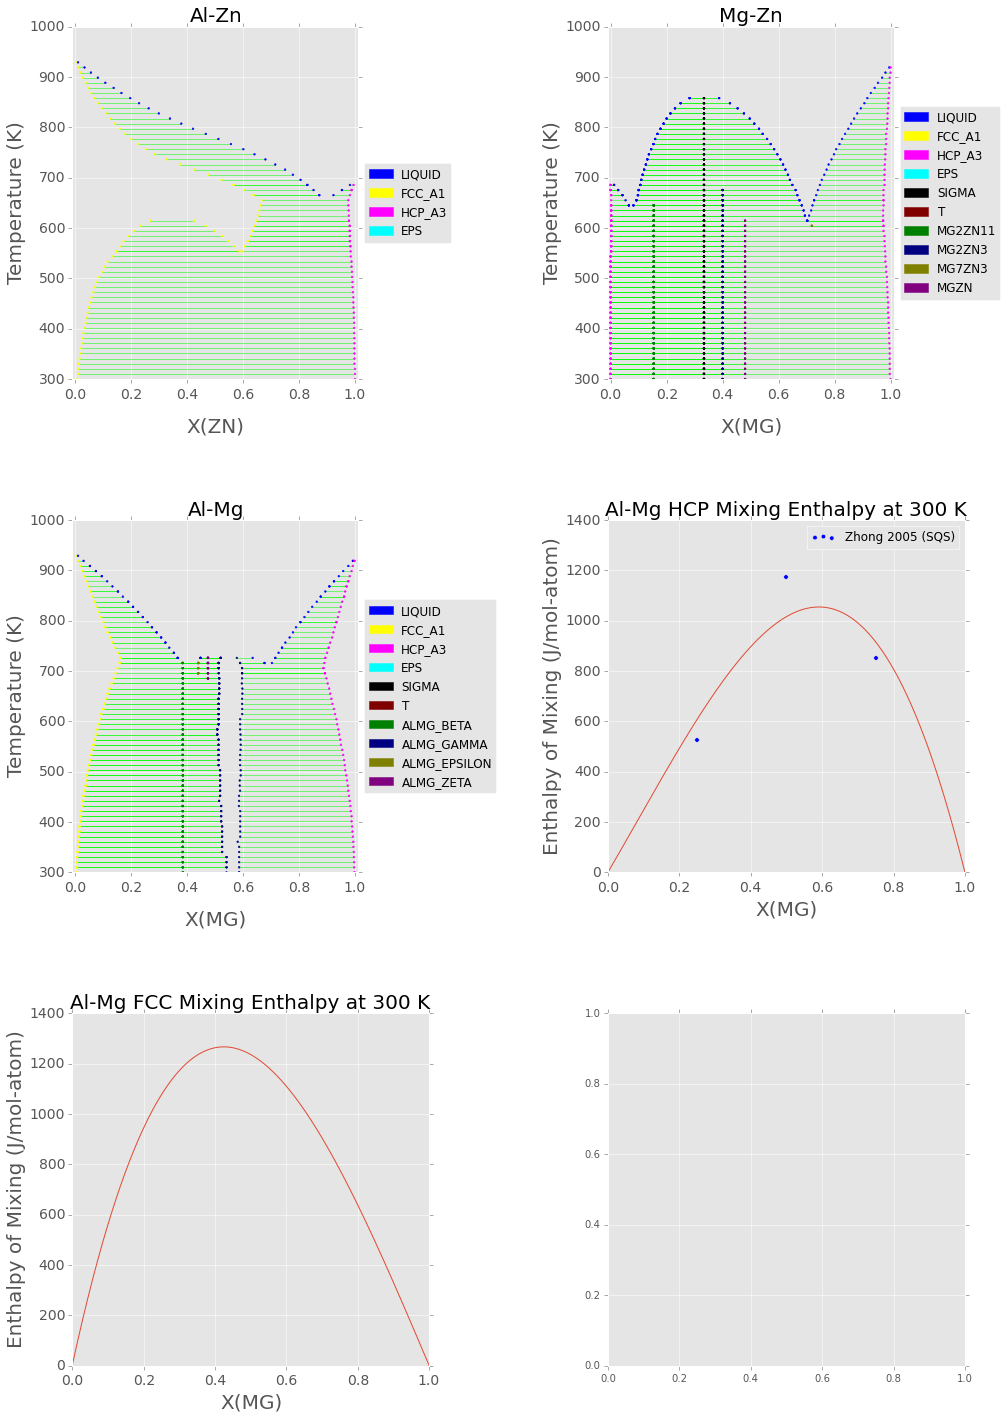

In [3]:
fig = plt.figure(figsize=(16, 24))
gs = gridspec.GridSpec(3, 2, hspace=0.4, wspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
binplot(dbf, ['AL', 'ZN', 'VA'], phases_alzn, 'X(ZN)', 300, 1000, ax=ax1, model=alzn_models)
binplot(dbf, ['MG', 'ZN', 'VA'], phases_mgzn, 'X(MG)', 300, 1000, ax=ax2, model=mgzn_models)
binplot(dbf, ['AL', 'MG', 'VA'], phases_almg, 'X(MG)', 300, 1000, ax=ax3, model=almg_models)
ax4.plot(almg_enthalpies_by_phase['HCP_A3']['X(MG)'], almg_enthalpies_by_phase['HCP_A3']['MIX_HM'])
ax4.scatter(zhong_2005_hcp_sqs[:, 0], zhong_2005_hcp_sqs[:, 1], label='Zhong 2005 (SQS)')
ax4.set_xlim((0,1))
ax4.set_ylim(bottom=0)
ax4.set_title('Al-Mg HCP Mixing Enthalpy at 300 K', fontsize=20)
ax4.set_xlabel('X(MG)', fontsize=20)
ax4.set_ylabel('Enthalpy of Mixing (J/mol-atom)', fontsize=20)
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.legend()
ax5.plot(almg_enthalpies_by_phase['FCC_A1']['X(MG)'], almg_enthalpies_by_phase['FCC_A1']['MIX_HM'])
#ax5.scatter(zhong_2005_hcp_sqs[:, 0], zhong_2005_hcp_sqs[:, 1], label='Zhong 2005 (SQS)')
ax5.set_xlim((0,1))
ax5.set_ylim(bottom=0)
ax5.set_title('Al-Mg FCC Mixing Enthalpy at 300 K', fontsize=20)
ax5.set_xlabel('X(MG)', fontsize=20)
ax5.set_ylabel('Enthalpy of Mixing (J/mol-atom)', fontsize=20)
ax5.tick_params(axis='both', which='major', labelsize=14)
#ax5.legend()
plt.show()

## Performing a fit

We perform the fit using the **fit_model** routine in pycalphad.

In [ ]:
import pandas as pd
from pycalphad.residuals import fit_model

liang96_alzn_parameters = {
    'LIQALZN0A':   10288.0,
    'LIQALZN0B':   -3.035,
    'LIQALZN1A':   -810.0,
    'LIQALZN1B':   0.471,
    'FCCALZN0A':   6656.0,
    'FCCALZN0B':   1.615,
    'FCCALZN1A':   6793.0,
    'FCCALZN1B':   -4.982,
    'FCCALZN2A':   -5352.0,
    'FCCALZN2B':   7.261,
    'HCPALZN0A':   14620,
    }
liang96_almg_parameters = {
    'LIQALMG0A':   -11200,
    'LIQALMG0B':   9.578,
    'FCCALMG0A':   4945.7,
    'FCCALMG0B':   -1.318,
    'FCCALMG1A':   1594.4,
    'FCCALMG1B':   -.973,
    'HCPALMG0A':   4063.4,
    'HCPALMG0B':   -3.243,
    'HCPALMG1A':   -1642.1,
    'ALMG_EPSILONALMG0A': -768.3,
    'ALMG_EPSILONALMG0B': -3.119,
    'ALMG_GAMMAMGALAL0A': -1270,
    'ALMG_GAMMAMGALAL0B': -1.75,
    'ALMG_GAMMAMGMGAL0A': -2441.4,
    'ALMG_GAMMAMGMGAL0B': .219,
    'ALMG_GAMMAMGALMG0A': 1279.6,
    'ALMG_GAMMAMGALMG0B': 1.1606,
    'ALMG_GAMMAMGMGMG0A': 5000,
}
from pycalphad.log import debug_mode
import lmfit
#debug_mode()
phase_eq = pd.read_csv('almg_test_phase_eq.csv')
phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'ALMG_EPSILON', 'ALMG_BETA', 'ALMG_GAMMA']
comps = ['AL', 'MG', 'VA']
start_models = {name: Model(dbf, comps, name, parameters=liang96_almg_parameters) for name in phases}
%time result, mi = fit_model(liang96_almg_parameters, phase_eq, dbf, comps, phases, maxfev=50)
fit_models = {name: Model(dbf, comps, name, parameters=result) for name in phases}

In [3]:
print(lmfit.report_fit(mi.params))
#print(lmfit.conf_interval(mi))

[[Variables]]
    ALMG_GAMMAMGALMG0B:   0.50296990 +/- 1.57e+04 (3129429.56%) (init= 1.1606)
    FCCALMG1B:            2.07434368 +/- nan      (nan%) (init=-0.973)
    FCCALMG1A:            3799.71529 +/- nan      (nan%) (init= 1594.4)
    ALMG_GAMMAMGALMG0A:   1026.47676 +/- 1.09e+07 (1061442.91%) (init= 1279.6)
    HCPALMG0A:            4675.86971 +/- 1.75e+12 (37379295572.96%) (init= 4063.4)
    HCPALMG0B:           -2.37962589 +/- 2.46e+09 (103535544490.92%) (init=-3.243)
    ALMG_EPSILONALMG0A:  -732.004526 +/- 4.17e+04 (5702.59%) (init=-768.3)
    ALMG_GAMMAMGMGAL0A:  -2282.27742 +/- 1.37e+06 (59849.04%) (init=-2441.4)
    ALMG_GAMMAMGMGMG0A:   4978.02711 +/- 2.20e+06 (44225.78%) (init= 5000)
    ALMG_EPSILONALMG0B:  -2.94792226 +/- 70.64129 (2396.31%) (init=-3.119)
    FCCALMG0A:            4458.48315 +/- nan      (nan%) (init= 4945.7)
    LIQALMG0B:            10.3427316 +/- 411.3745 (3977.43%) (init= 9.578)
    LIQALMG0A:           -10709.0461 +/- 3.01e+05 (2806.85%) (init=-11

MinimizerException: 
Cannot determine Confidence Intervals without sensible uncertainty estimates

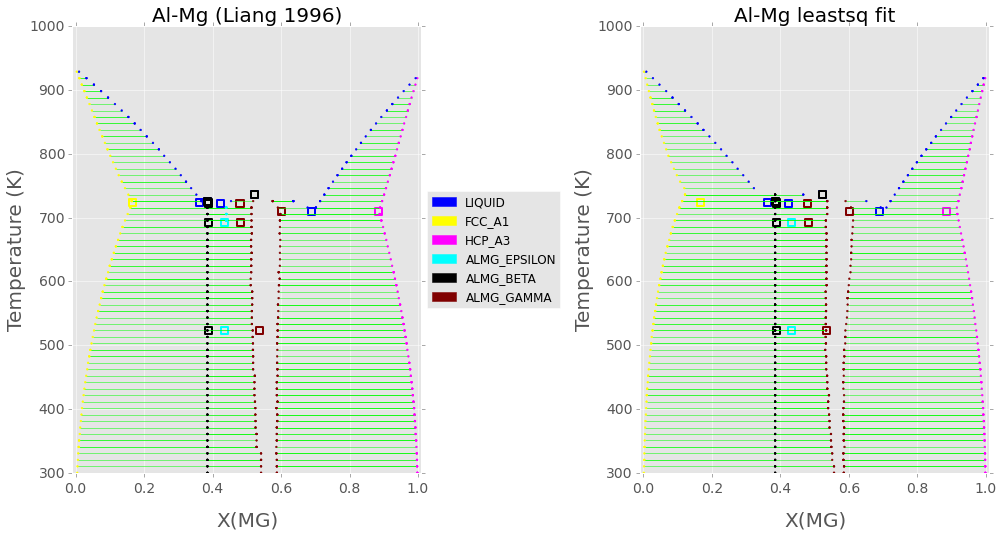

In [7]:
from pycalphad.plot.utils import phase_legend
legend_handles, colors = phase_legend(phases)
almg_start_df = energy_surf(dbf, ['AL', 'MG', 'VA'], phases, T=550.0, model=start_models)
almg_fit_df = energy_surf(dbf, ['AL', 'MG', 'VA'], phases, T=550.0, model=fit_models)
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(1, 2, wspace=0.3, hspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
#ax3 = fig.add_subplot(gs[1, 0])
#ax4 = fig.add_subplot(gs[1, 1])
#almg_enthalpies = energy_surf(dbf, ['AL', 'MG', 'VA'], phases, output='MIX_HM', T=300.0, model=fit_models)
#almg_enthalpies.sort('X(MG)', inplace=True) # points need to be ordered on x axis for line plot to work
#almg_enthalpies_by_phase = dict(list(almg_enthalpies.groupby('Phase')))
for phase in phases:
    phase_eq[phase_eq['Phase'] == phase].plot(kind='scatter', x='X(MG)', y='T', ax=ax1, edgecolor=colors[phase],
                                                    s=50, xlim=(0,1), marker='s', linewidth=2, facecolor='none',
                                                    legend=False)
    phase_eq[phase_eq['Phase'] == phase].plot(kind='scatter', x='X(MG)', y='T', ax=ax2, edgecolor=colors[phase],
                                                    s=50, xlim=(0,1), marker='s', linewidth=2, facecolor='none',
                                                    legend=False)
#    ax3 = almg_start_df[almg_start_df['Phase'] == phase].plot(kind='scatter', x='X(MG)', y='GM', ax=ax3, color=colors[phase], s=1, xlim=(0,1))
#    ax4 = almg_fit_df[almg_fit_df['Phase'] == phase].plot(kind='scatter', x='X(MG)', y='GM', ax=ax4, color=colors[phase], s=1, xlim=(0,1))

ax1 = binplot(dbf, comps, phases, 'X(MG)', 300, 1000, ax=ax1, model=start_models, pdens=5000)
ax1.set_title('Al-Mg (Liang 1996)', fontsize=20)
ax2 = binplot(dbf, comps, phases, 'X(MG)', 300, 1000, ax=ax2, model=fit_models, pdens=5000)
ax2.get_legend().set_visible(False)
ax2 = ax2.set_title('Al-Mg leastsq fit', fontsize=20)

## Quantitative comparison of assessment values with fitted values

The difference can be partially understood by the fact that Liang's assessment also relies on thermochemical data while here we only fit to points on the phase diagram.

In [6]:
for param_name, param_value in sorted(result.items()):
    percent_change = abs(param_value - liang96_almg_parameters[param_name]) / abs(liang96_almg_parameters[param_name])
    print('{:<20}: {:>8.2%} difference from original'.format(param_name, percent_change))

ALMG_EPSILONALMG0A  :    0.20% difference from original
ALMG_EPSILONALMG0B  :    0.50% difference from original
ALMG_GAMMAMGALAL0A  :    4.03% difference from original
ALMG_GAMMAMGALAL0B  :    4.82% difference from original
ALMG_GAMMAMGALMG0A  :   12.48% difference from original
ALMG_GAMMAMGALMG0B  :   27.46% difference from original
ALMG_GAMMAMGMGAL0A  :    0.44% difference from original
ALMG_GAMMAMGMGAL0B  :   22.82% difference from original
ALMG_GAMMAMGMGMG0A  :    1.55% difference from original
FCCALMG0A           :    4.23% difference from original
FCCALMG0B           :   21.95% difference from original
FCCALMG1A           :   28.40% difference from original
FCCALMG1B           :   64.31% difference from original
HCPALMG0A           :    9.55% difference from original
HCPALMG0B           :   16.86% difference from original
HCPALMG1A           :   33.23% difference from original
LIQALMG0A           :    1.39% difference from original
LIQALMG0B           :    2.30% difference from o

In [2]:
from pycalphad.residuals import residual_thermochemical
from pycalphad.eq.utils import make_callable, generate_dof
from pycalphad import Model
import itertools
import lmfit

def fit_model_thermochemical(guess, data, dbf, comps, phases, **kwargs):
    """
    Fit model parameters to input data based on an initial guess for parameters.

    Parameters
    ----------
    guess : dict
        Parameter names to fit with initial guesses.
    data : list of DataFrames
        Input data to fit.
    dbf : Database
        Thermodynamic database containing the relevant parameters.
    comps : list
        Names of components to consider in the calculation.
    phases : list
        Names of phases to consider in the calculation.

    Returns
    -------
    (Dictionary of fit key:values), (lmfit minimize result)

    Examples
    --------
    None yet.
    """
    if 'maxfev' not in kwargs:
        kwargs['maxfev'] = 100
    fit_params = lmfit.Parameters()
    for guess_name, guess_value in guess.items():
        fit_params.add(guess_name, value=guess_value)
    param_names = fit_params.valuesdict().keys()
    fit_models = {name: Model(dbf, comps, name) for name in phases}
    fit_variables = dict()
    for name, mod in fit_models.items():
        fit_variables[name], _ = generate_dof(dbf.phases[name], mod.components)
    callables = {name: make_callable(mod.ast, itertools.chain(param_names, [v.T],
                                                              fit_variables[name])) \
                    for name, mod in fit_models.items()}
    out = lmfit.minimize(residual_thermochemical, fit_params,
                         args=(data, dbf, comps, fit_models, callables))
    return fit_params.valuesdict(), out

:0: FutureWarning: IPython widgets are experimental and may change in the future.
